In [129]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import networkx as nx
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

Dataset de Coactivation matrix

Utilizar el método de codo para determinar el número de cluster óptimo (adecuado)
Usando el número de clusters encontrado por el método del codo, usar k-means y gaussian mixture en este dataset

In [131]:
path = r"C:\Users\marca\OneDrive\Documentos\6 semestre neuro\Neurociencias-2025-2\S03_datasets\coactivation_matrix\Coactivation_matrix.mat"

mat_json = scipy.io.loadmat(path)
x,y,z = mat_json['Coord'][:,0],mat_json['Coord'][:,1], mat_json['Coord'][:,2] 
CM=mat_json['Coactivation_matrix']

C:\Users\marca\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\marca\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\marca\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\marca\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

Text(0.5, 1.0, 'Método del codo (datos originales)')

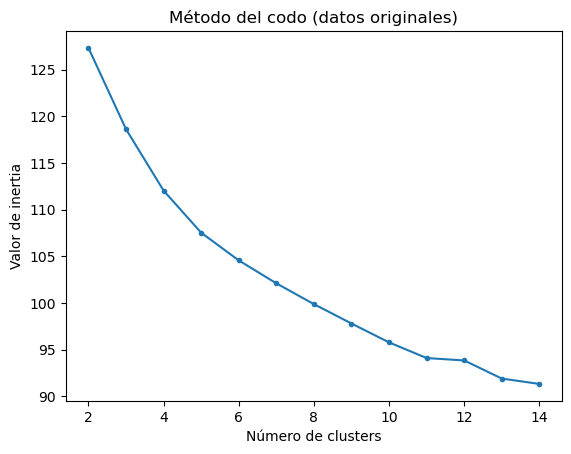

In [132]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

inertia = []
for no_clusters in range(2, 15):
    kmeans = KMeans(n_clusters=no_clusters)
    kmeans.fit(CM)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 15), inertia, '.-')
plt.xlabel('Número de clusters')
plt.ylabel('Valor de inertia')
plt.title('Método del codo (datos originales)')

In [133]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(CM)

gm = GaussianMixture(n_components=5, random_state=0).fit(CM)
labels = gm.predict(CM)

C:\Users\marca\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\marca\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\marca\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [134]:
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import confusion_matrix

def match_clusters(true_labels, pred_labels):
    cm = confusion_matrix(true_labels, pred_labels)
    row_ind, col_ind = linear_sum_assignment(-cm)  # Maximize matches
    mapping = {col: row for row, col in zip(row_ind, col_ind)}
    aligned_labels = np.array([mapping[label] for label in pred_labels])
    return aligned_labels, mapping

aligned_other, mapping = match_clusters(kmeans.labels_, labels)

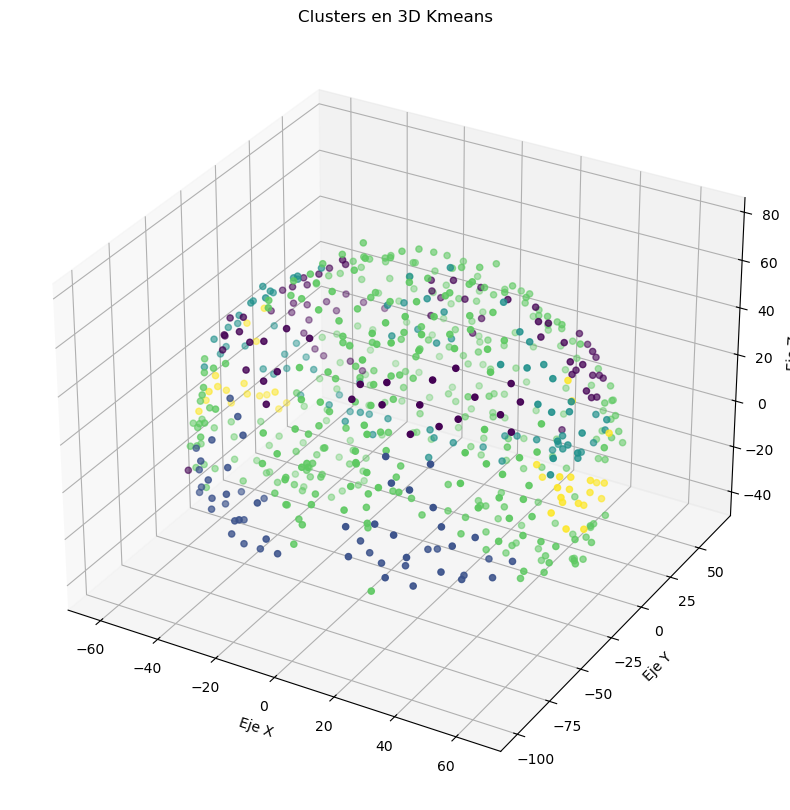

In [135]:
G = nx.from_numpy_array(CM, create_using=nx.DiGraph)
    
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

# Suponiendo que x, y, z son tus coordenadas y label es tu array de clusters
ax.scatter3D(x, y, z, c=kmeans.labels_, cmap='viridis')  # Puedes cambiar 'viridis' por otro cmap si quieres

ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Eje Z')
plt.title('Clusters en 3D Kmeans')
plt.show()


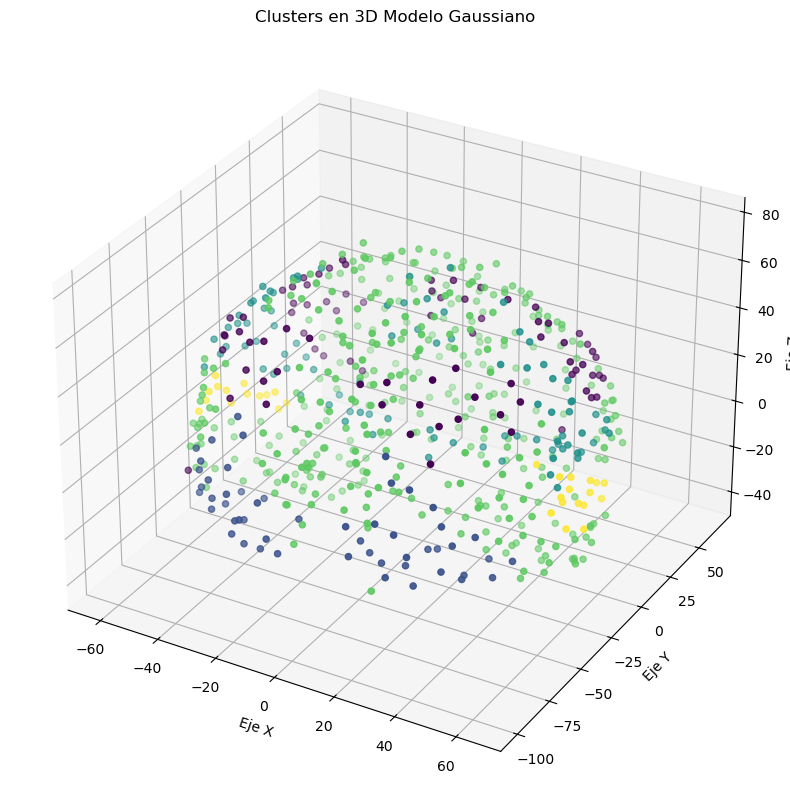

In [136]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

# Suponiendo que x, y, z son tus coordenadas y label es tu array de clusters
ax.scatter3D(x, y, z, c=aligned_other, cmap='viridis')  # Puedes cambiar 'viridis' por otro cmap si quieres

ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Eje Z')
plt.title('Clusters en 3D Modelo Gaussiano')
plt.show()

En el scatter veo que las cortezas occipitales visuales forman un cluster, la integración entre estas áreas es alta. Vemos tambien las cortezas temporales forman otro cluster, que son de procesamiento de memoria, audición, lenguaje, etc. Las cortezas frontales tmb forman otro cluster. Cortezas parietales somatosensoriales, veo lo que quizas parece las áreas de representación somatotópica. Y el resto del cerebro jaja.

Brain tumor

Utilizar el método de codo para determinar el número de cluster óptimo (adecuado)
Utilizar 2 cluster con cada método (k-means, gaussian clusters y cluster jerárquico) y calcular la matriz de confusión de cada método usando la columna 'Class' como groundthruth
¿qué método recomendarías para este dataset?, ¿por qué?

In [139]:
path = r"C:\Users\marca\OneDrive\Documentos\6 semestre neuro\Neurociencias-2025-2\S03_datasets\Brain_tumor\Brain Tumor.csv"
df = pd.read_csv(path)
X = df.iloc[:, 2:-1]
X

,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation
0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939
1,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834
2,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014
3,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189
4,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789
...,...,...,...,...,...,...,...,...,...,...,...,...
3757,21.234512,1208.850174,34.768523,0.063774,2.082079,4.647310,158.437600,0.220666,0.048693,0.487131,5.211739,0.950972
3758,20.435349,1227.151440,35.030721,0.066763,2.144625,4.882034,161.158675,0.225931,0.051045,0.502712,5.083126,0.952749
3759,18.011520,1151.582765,33.934978,0.068396,2.308349,5.579498,167.130118,0.228930,0.052409,0.492269,5.103700,0.952181
3760,13.330429,945.732779,30.752769,0.087872,2.732822,7.757570,223.812932,0.261527,0.068397,0.480064,6.439784,0.940898


C:\Users\marca\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\marca\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\marca\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\marca\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\marca\anaconda3\Lib\site-packages\sklearn\clust

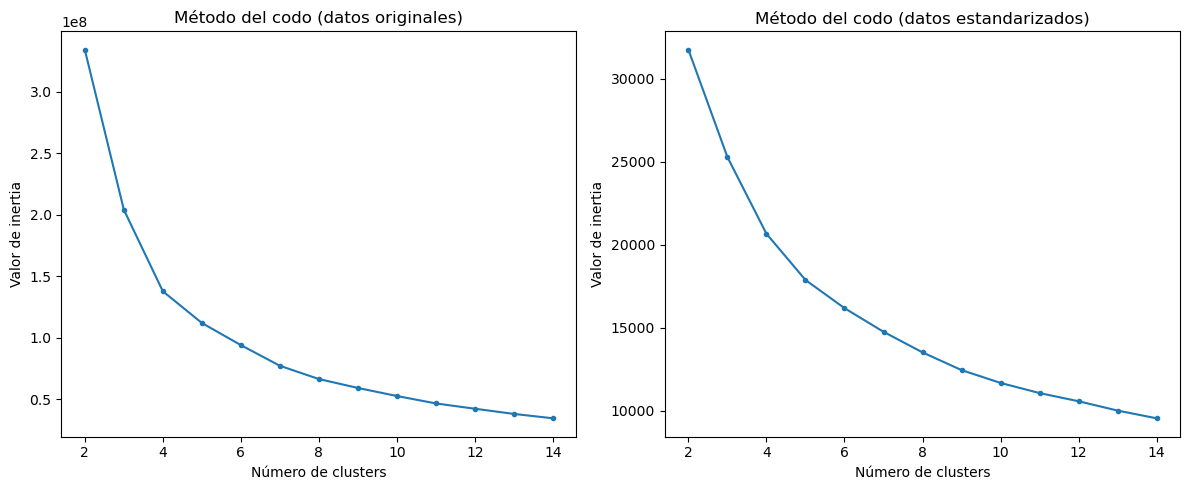

In [140]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

X_std = StandardScaler().fit_transform(X)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  
inertia = []
for no_clusters in range(2, 15):
    kmeans = KMeans(n_clusters=no_clusters)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 15), inertia, '.-')
plt.xlabel('Número de clusters')
plt.ylabel('Valor de inertia')
plt.title('Método del codo (datos originales)')

plt.subplot(1, 2, 2)  
inertia = []
for no_clusters in range(2, 15):
    kmeans = KMeans(n_clusters=no_clusters)
    kmeans.fit(X_std)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 15), inertia, '.-')
plt.xlabel('Número de clusters')
plt.ylabel('Valor de inertia')
plt.title('Método del codo (datos estandarizados)')

plt.tight_layout()
plt.show()

La inflexión más bonita se observa en la data normal, sin normalizar. El número óptimo de clusters es 4 !!

In [142]:
no_clusters = 2
kmeans = KMeans(n_clusters=no_clusters)
kmeans.fit(X)

# Construyo datafrae
df_std = pd.DataFrame(data=X, columns=df.columns[:-1])
df_std['kmeans'] = kmeans.labels_
clusters_df = kmeans.cluster_centers_
clusters_df

C:\Users\marca\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[7.33314253e+00, 4.73283097e+02, 2.09414664e+01, 8.72017391e-02,
        4.43670155e+00, 2.91896807e+01, 1.18852278e+02, 2.29700389e-01,
        6.97714721e-02, 5.00601507e-01, 4.44278079e+00, 9.52870513e-01],
       [1.49984750e+01, 1.31890804e+03, 3.60207731e+01, 3.88464486e-02,
        3.24916594e+00, 1.21198385e+01, 1.51242390e+02, 1.40823104e-01,
        3.01606640e-02, 4.24687247e-01, 5.35204956e+00, 9.63168790e-01]])

C:\Users\marca\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Cluster Jerárquico')

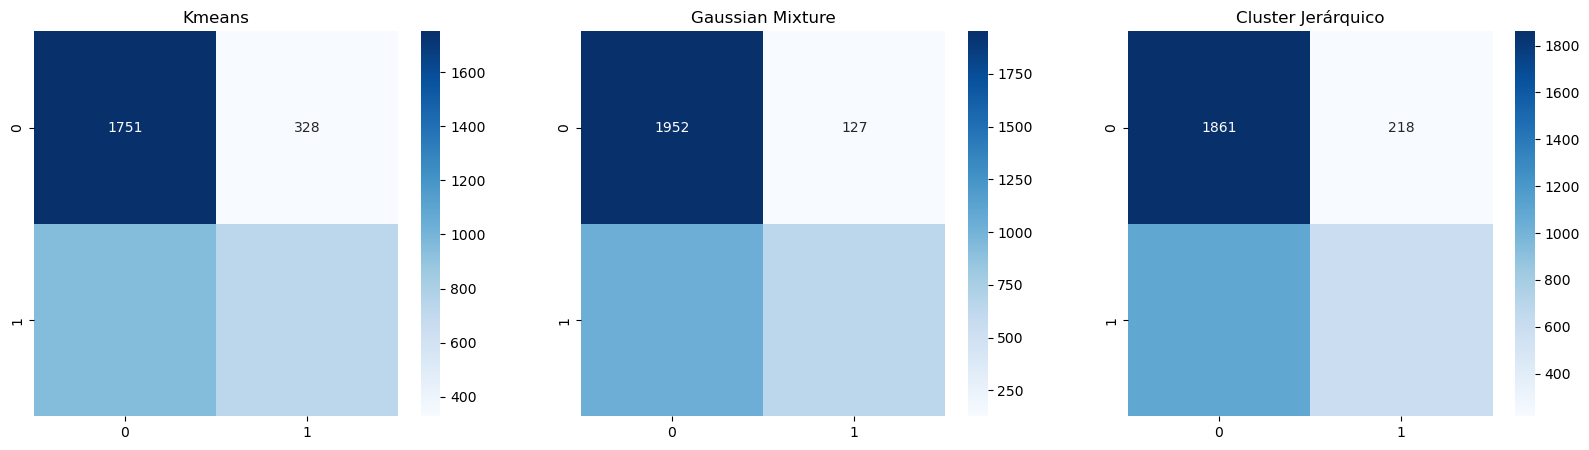

In [149]:

Xc=df.iloc[:,1:-1]
Xc
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
Xc['kmeans'] = kmeans.labels_

gm = GaussianMixture(n_components=2, random_state=0).fit(X)
labels = gm.predict(X)
Xc['modelo Gaussiano'] = labels

Z = linkage(X, 'ward')
clusters = fcluster(Z, t=2, criterion='maxclust')
Xc['cluster_jerarquico'] = clusters

mapeo = {1: 0, 0: 1}
mapeoo = {1: 1, 2: 0}
#Xc['kmeans'] = Xc['kmeans'] .map(mapeo)
Xc['modelo Gaussiano'] = Xc['modelo Gaussiano'].map(mapeo)
Xc['cluster_jerarquico'] = Xc['cluster_jerarquico'].map(mapeoo)

cm_kmeans = confusion_matrix(Xc.Class, Xc.kmeans, labels=Xc.Class.unique())
cm_jerarquic = confusion_matrix(Xc.Class, Xc['cluster_jerarquico'], labels=Xc.Class.unique())
cm_gauss = confusion_matrix(Xc.Class, Xc['modelo Gaussiano'], labels=Xc.Class.unique())


plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)  
sns.heatmap(cm_kmeans, annot=True, fmt='d', cmap="Blues",xticklabels=Xc.Class.unique(), yticklabels=Xc.Class.unique()).set_title("Kmeans")

plt.subplot(1, 3, 2)  
sns.heatmap(cm_gauss, annot=True,fmt='d', cmap="Blues",xticklabels=Xc.Class.unique(), yticklabels=Xc.Class.unique()).set_title("Gaussian Mixture")

plt.subplot(1, 3, 3)  
sns.heatmap(cm_jerarquic, annot=True, fmt='d', cmap="Blues",
            xticklabels=Xc.Class.unique(), yticklabels=Xc.Class.unique()).set_title("Cluster Jerárquico")

Recomiendo Gaussian Mixture

**Accuracy (Exactitud):** Mide el porcentaje de predicciones correctas respecto al total. Fórmula: accuracy = (TP + TN) / (TP + TN + FP + FN). Ejemplo: Con y_true = [1,0,1,0] y y_pred = [1,0,0,0], accuracy = 0.75 (3 correctas de 4).
***
Precision (Precisi****): Indica la proporción de predicciones positivas correctas. Fórmula: precision = TP / (TP + FP). Ejemplo: Para y_true = [1,0,1,1] y y_pred = [1,1,0,1], precision = 0.67 (2 TP de 3 predicciones positivas).****

Recall (Sensibid****ad): Mide la capacidad de detectar casos positivos reales. Fórmula: recall = TP / (TP + FN). Ejemplo: Con y_true = [1,0,1,1] y y_pred = [1,0,0,1], recall = 0.67 (2 TP de 3 positivos rees****).
F1-****Score: Balance entre Precision y Recall usando media armónica. Fórmula: f1_score = 2*(precision*recall)/(precision+recall). Ejemplo: Si precision=0.67 y recall=1.0, F1=0.80.w false positives).

Las definiciones se relacionan con la matriz de confusión directamente, las celdas TN, FP; FN TP

Accuracy depende de toda la diagonal principal (TP+TN).

Precision se centra en la columna de predicciones positivas (TPvs.FP).

Recall se centra en la fila de reales positivos (TPvs.FN).

F1-Score es el puente entre Precision y Recall.

In [147]:
def metricas(cm):
    TN, FP = cm[0]
    FN, TP = cm[1]
    
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    resultados = {
        'Accuracy': round(accuracy, 4),
        'Precision': round(precision, 4),
        'Recall': round(recall, 4),
        'F1-score': round(f1_score, 4)
    }
    
    return resultados

print("Kmeans", metricas(cm_kmeans))
print("Gaussian Mixture", metricas(cm_gauss))
print("Cluster Jerárquico", metricas(cm_jerarquic))

Kmeans {'Accuracy': 0.34, 'Precision': 0.352, 'Recall': 0.5651, 'F1-score': 0.4338}
Gaussian Mixture {'Accuracy': 0.6909, 'Precision': 0.8359, 'Recall': 0.3844, 'F1-score': 0.5267}
Cluster Jerárquico {'Accuracy': 0.6512, 'Precision': 0.7299, 'Recall': 0.35, 'F1-score': 0.4731}


Gaussian Mixture es Mejor !!!! yay pero de todos modos andan bajas :C